In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np 
import math

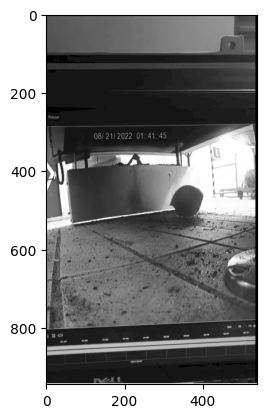

In [2]:
image = cv2.imread("img.PNG",0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def  point_transform(frame):
    #corner of the license plate that we wanna get perspective
    #pt1 = left upper, pt2 = right upper, pt2 = left bottom, pt3 = right bottom 
    pt1, pt2, pt3, pt4 = [0,350], [538,300],[10,650],[538,600]
    xf =  abs(pt2[0] - pt1[0])
    yf = abs(pt2[1] - pt1[1])
    width = int(math.sqrt(xf**2 + yf**2))

    x1f =  abs(pt3[1] - pt1[1])
    y1f = abs(pt3[0] - pt1[0])
    height = int(math.sqrt(x1f**2 + y1f**2))

    pts1 = np.float32([pt1, pt2, pt3, pt4])
    pts2 = np.float32([[0,0], [width,0], [0,height], [width, height]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    imgoutput = cv2.warpPerspective(image, matrix,(width,height))

    return imgoutput

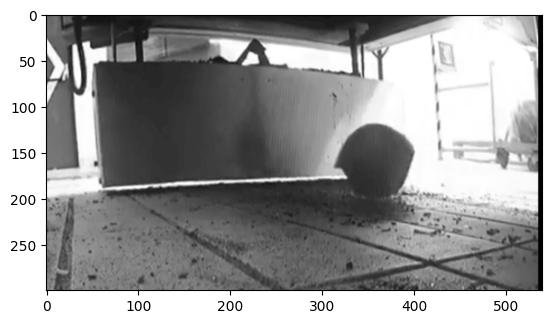

In [4]:
cropped = point_transform(image)
plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))
plt.show()

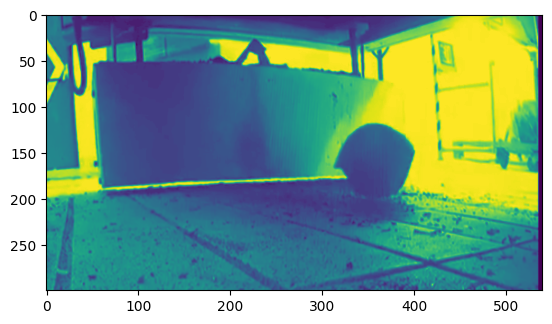

In [5]:
thresh = cv2.threshold(cropped, 255, 100, cv2.THRESH_TOZERO_INV)[1]
plt.imshow(thresh)
plt.show()


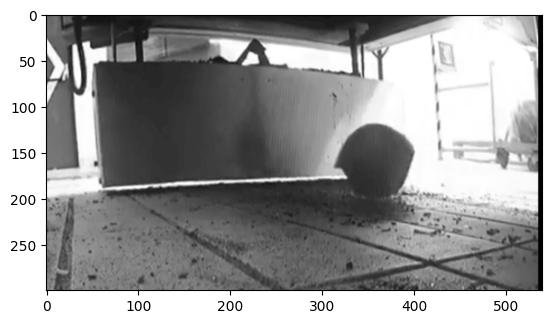

In [6]:
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#image = cv2.imread('data/balls.jpg')
#output = image.copy()
image = cropped
height, width = image.shape[:2]
maxRadius = int(1.1*(width/12)/2)
minRadius = int(0.9*(width/12)/2)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=gray, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=2*minRadius,
                           param1=50,
                           param2=50,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )

if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

    plt.imshow(output)
else:
    print ('No circles found')